In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import *

In [80]:
atten = pd.read_csv('attention.csv.gz', index_col=0)
tmp = np.load('../../Drug_Response_Prediction_using_GNN/exp/idxs.npy', allow_pickle=True)[1]
atten.index = tmp
atten.columns = tmp
atten

,740,752,755,762,1390,1895,3053,3088,6396,8806,...,ZNF207,ZNF22,ZNF580,ZNF593,ZNF706,ZNHIT1,ZNHIT3,ZNRD1,ZWINT,ZYX
740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003412,0.003558,0.003408,0.003410,0.003498,0.003412,0.003494,0.003540,0.003394,0.003387
752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003327,0.003505,0.003340,0.003308,0.003361,0.003338,0.003412,0.003434,0.003295,0.003294
755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003307,0.003430,0.003286,0.003286,0.003371,0.003272,0.003372,0.003386,0.003289,0.003258
762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003330,0.003448,0.003285,0.003300,0.003380,0.003285,0.003378,0.003418,0.003271,0.003272
1390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003382,0.003535,0.003351,0.003374,0.003419,0.003370,0.003442,0.003498,0.003341,0.003323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNHIT1,0.000404,0.000319,0.000413,0.000323,0.000405,0.000415,0.000411,0.000313,0.000312,0.000314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZNHIT3,0.000419,0.000321,0.000419,0.000320,0.000415,0.000422,0.000421,0.000312,0.000313,0.000314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZNRD1,0.000407,0.000317,0.000414,0.000319,0.000407,0.000416,0.000411,0.000313,0.000312,0.000314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZWINT,0.000398,0.000316,0.000404,0.000315,0.000402,0.000411,0.000408,0.000309,0.000305,0.000310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [81]:
drug_gene = atten.iloc[:269, 329:]
cell_gene = atten.iloc[269:329, 329:]

In [82]:
ctrpv1 = pd.read_csv('../../ctrpv1.csv', index_col=0)
ctrpv1

,A549,COLO205,HCT116,HT29,IGROV1,KM12,MCF7,NCIH23,NCIH460,NCIH522,OVCAR4,OVCAR8,PC3,RPMI8226,SF295,SKMEL28,SKMEL5,SKOV3,SW620
26980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9405,NaN,NaN,NaN,NaN,NaN,NaN
752840,NaN,NaN,6.6623,6.1239,NaN,NaN,NaN,NaN,6.7756,NaN,NaN,NaN,NaN,7.1621,NaN,6.6990,6.8242,NaN,6.5517
758255,NaN,NaN,4.0665,8.4548,4.9962,3.6106,5.3898,NaN,4.7958,NaN,5.6983,2.00770,NaN,2.9339,NaN,6.6834,5.3774,NaN,5.2421
747856,NaN,NaN,5.5171,6.1361,5.6195,6.2744,5.6660,NaN,6.3585,NaN,5.0115,2.97630,NaN,5.4659,NaN,6.6865,6.6889,NaN,5.2218
758706,6.233567,6.3731,6.6951,7.1575,6.6991,7.1033,6.4730,5.2885,7.0473,5.0244,6.2554,4.52970,3.5243,6.5665,3.7852,7.6688,7.1281,5.7760,6.3947
754771,4.165133,5.7845,6.3279,5.3747,5.8723,5.0476,4.8630,4.3387,6.6863,6.2866,4.7557,4.91540,5.9940,4.7864,4.5178,7.6593,5.8887,6.7973,5.1640
753686,NaN,NaN,5.5171,6.1361,5.6195,6.2744,5.6660,NaN,6.3585,NaN,5.0115,2.97630,NaN,5.4659,NaN,6.6865,6.6889,NaN,5.2218
633782,6.233567,6.3731,6.6951,7.1575,6.6991,7.1033,6.4730,5.2885,7.0473,5.0244,6.2554,4.52970,3.5243,6.5665,3.7852,7.6688,7.1281,5.7760,6.3947
673596,NaN,NaN,1.8144,8.3172,3.8589,3.4089,5.0787,NaN,3.5971,NaN,2.4142,0.99683,2.9556,2.8347,NaN,7.2151,3.8132,NaN,3.0340


In [83]:
ctrpv2 = pd.read_csv('../../ctrpv2.csv', index_col=0)
ctrpv2

,7860,A498,A549,ACHN,BT549,CAKI1,COLO205,DU145,EKVX,HCT116,...,SKMEL2,SKMEL28,SKMEL5,SKOV3,SNB75,SW620,T47D,UACC257,UACC62,UO31
740,7.1142,8.3677,9.031550,NaN,9.9726,13.871,11.771,7.13555,10.124,6.370,...,11.274,12.4860,9.7773,13.599,7.0399,6.8743,7.343,4.8393,11.100,6.8508
3088,13.7070,NaN,14.453333,13.488,14.5930,14.924,14.235,13.69800,18.510,14.151,...,NaN,14.7920,14.2760,14.156,14.5600,13.1860,13.812,15.9510,14.372,NaN
26271,NaN,NaN,15.170333,NaN,NaN,NaN,14.840,NaN,NaN,14.500,...,NaN,8.1927,15.4550,14.882,NaN,15.4530,NaN,NaN,NaN,NaN
26980,11.9530,11.5260,12.764000,11.438,13.3250,13.101,11.566,10.69400,14.030,12.201,...,NaN,15.0070,14.0890,13.886,12.0740,13.9650,13.153,12.4190,12.856,11.5290
109724,NaN,NaN,14.363333,NaN,NaN,NaN,15.151,NaN,NaN,14.650,...,NaN,14.4750,15.0000,15.363,NaN,15.0000,NaN,NaN,NaN,NaN
637037,15.6770,NaN,NaN,14.744,15.7170,14.558,NaN,14.56850,13.630,NaN,...,15.252,NaN,NaN,NaN,14.5730,NaN,13.992,14.3550,14.737,13.9380
719276,NaN,NaN,NaN,NaN,NaN,NaN,13.703,NaN,NaN,14.840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752840,15.2880,15.9980,14.300667,15.325,14.5890,14.993,15.449,14.80200,15.466,15.000,...,14.804,15.9950,14.6160,14.247,15.0000,15.0000,15.372,14.8830,15.000,14.5050
753686,14.3430,NaN,14.129667,14.629,13.6320,14.028,14.105,13.41400,12.319,15.000,...,15.496,16.5020,15.5770,14.815,13.6970,13.3990,13.550,14.6720,14.714,15.0000
754771,13.9280,15.6580,14.243000,14.720,14.2210,14.599,14.406,14.18800,10.774,14.880,...,15.000,16.0150,14.5300,14.239,13.5060,14.1400,15.000,14.7500,14.115,13.3240


In [84]:
cellines = pd.read_csv('/Users/yoshitakainoue/Downloads/nci_gdsc_ctrp.csv')
cellines = cellines[['nci60', 'ctrp']].dropna()
cellines

,nci60,ctrp
0,BR:BT-549,BT549
1,BR:HS 578T,HS578T
2,BR:MCF7,MCF7
3,BR:MDA-MB-231,MDAMB231
4,BR:T-47D,T47D
5,CNS:SF-268,SF268
6,CNS:SF-295,SF295
7,CNS:SF-539,SF539
8,CNS:SNB-75,SNB75
10,CO:COLO 205,COLO205


In [85]:
nci_dr = pd.read_csv('../../Drug_Response_Prediction_using_GNN/data/original/nci60Act.csv', index_col=0)
nci_dr = nci_dr.loc[:, cellines.nci60]
nci_dr.columns = list(cellines.ctrp)
nci_dr

,BT549,HS578T,MCF7,MDAMB231,T47D,SF268,SF295,SF539,SNB75,COLO205,...,OVCAR5,OVCAR8,SKOV3,DU145,PC3,7860,A498,ACHN,CAKI1,UO31
1,-0.231499,-0.815183,-0.271314,-0.303539,1.934731,-0.357577,-0.719253,-0.380720,-0.175915,0.008989,...,-0.593334,-0.413599,-0.868240,-0.434885,-0.403983,-0.519867,-1.648059,1.657273,-0.269717,1.059515
17,1.483613,-0.222024,-0.354110,-0.304675,1.509397,0.335572,0.424922,1.140166,0.330808,-0.041714,...,-0.422527,-0.572734,-0.492953,-0.941890,1.302516,0.521200,-0.329639,-0.941890,0.717851,1.120673
89,NaN,NaN,NaN,NaN,NaN,-0.184194,-1.429903,-0.165433,-0.216723,0.152000,...,-0.145313,0.185498,-0.126557,NaN,NaN,0.368433,-0.655707,-0.144006,0.743888,-0.118807
185,NaN,NaN,NaN,NaN,NaN,0.539343,NaN,0.230402,-1.125208,0.174485,...,-0.853432,0.095648,-2.151708,NaN,NaN,-0.061612,NaN,NaN,1.675353,0.918522
295,-0.264586,-0.264586,-0.264586,-0.264586,-0.264586,-0.264586,-0.264586,-0.264586,-0.264586,-0.264586,...,-0.264586,3.362653,-0.264586,-0.264586,-0.264586,4.822657,-0.264586,-0.264586,-0.264586,-0.264586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900911,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,...,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151,-0.167151
900922,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,...,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786,-0.169786
900964,-0.158754,-0.158754,-0.158754,-0.158754,-0.158754,-0.158754,-0.158754,-0.158754,-0.158754,NaN,...,-0.158754,-0.158754,-0.158754,NaN,-0.158754,-0.158754,-0.158754,-0.158754,-0.158754,-0.158754
900974,NaN,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453,...,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453,-0.132453


In [86]:
print('max: ', np.max(ctrpv1))
print('min: ', np.min(ctrpv1))
print('mean: ', np.mean(ctrpv1))

max:  8.4548
min:  0.99683
mean:  5.554842953216374


In [87]:
print('max: ', np.max(ctrpv2))
print('min: ', np.min(ctrpv2))
print('mean: ', np.mean(ctrpv2))

max:  18.51
min:  3.312
mean:  13.474020468431773


In [106]:
ctrpv1

,A549,COLO205,HCT116,HT29,IGROV1,KM12,MCF7,NCIH23,NCIH460,NCIH522,OVCAR4,OVCAR8,PC3,RPMI8226,SF295,SKMEL28,SKMEL5,SKOV3,SW620
26980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9405,NaN,NaN,NaN,NaN,NaN,NaN
752840,NaN,NaN,6.6623,6.1239,NaN,NaN,NaN,NaN,6.7756,NaN,NaN,NaN,NaN,7.1621,NaN,6.6990,6.8242,NaN,6.5517
758255,NaN,NaN,4.0665,8.4548,4.9962,3.6106,5.3898,NaN,4.7958,NaN,5.6983,2.00770,NaN,2.9339,NaN,6.6834,5.3774,NaN,5.2421
747856,NaN,NaN,5.5171,6.1361,5.6195,6.2744,5.6660,NaN,6.3585,NaN,5.0115,2.97630,NaN,5.4659,NaN,6.6865,6.6889,NaN,5.2218
758706,6.233567,6.3731,6.6951,7.1575,6.6991,7.1033,6.4730,5.2885,7.0473,5.0244,6.2554,4.52970,3.5243,6.5665,3.7852,7.6688,7.1281,5.7760,6.3947
754771,4.165133,5.7845,6.3279,5.3747,5.8723,5.0476,4.8630,4.3387,6.6863,6.2866,4.7557,4.91540,5.9940,4.7864,4.5178,7.6593,5.8887,6.7973,5.1640
753686,NaN,NaN,5.5171,6.1361,5.6195,6.2744,5.6660,NaN,6.3585,NaN,5.0115,2.97630,NaN,5.4659,NaN,6.6865,6.6889,NaN,5.2218
633782,6.233567,6.3731,6.6951,7.1575,6.6991,7.1033,6.4730,5.2885,7.0473,5.0244,6.2554,4.52970,3.5243,6.5665,3.7852,7.6688,7.1281,5.7760,6.3947
673596,NaN,NaN,1.8144,8.3172,3.8589,3.4089,5.0787,NaN,3.5971,NaN,2.4142,0.99683,2.9556,2.8347,NaN,7.2151,3.8132,NaN,3.0340


In [107]:
dr_ctrpv1 =  nci_dr.loc[ctrpv1.index, ctrpv1.columns]
dr_ctrpv1

,A549,COLO205,HCT116,HT29,IGROV1,KM12,MCF7,NCIH23,NCIH460,NCIH522,OVCAR4,OVCAR8,PC3,RPMI8226,SF295,SKMEL28,SKMEL5,SKOV3,SW620
26980,0.978023,-0.332497,-0.078131,-0.113384,-1.097564,-0.898324,1.178418,1.186441,2.591981,-0.013895,-1.204413,-0.438038,-0.945600,-0.982577,0.995225,-0.699786,0.472925,-0.328139,0.239485
752840,NaN,-0.149903,0.547954,-0.098225,2.931827,0.042712,0.899893,-0.368321,0.686990,0.958400,-0.288448,-0.069735,-0.889041,-0.889041,1.120460,-0.213539,-0.889041,-0.889041,-0.554450
758255,1.009416,-1.148032,0.029227,-0.401302,-1.218483,-0.425321,1.392023,0.511936,2.035560,0.400083,-1.621622,0.037284,-1.154155,0.505493,0.486239,-0.238048,0.610053,-0.180582,0.528973
747856,-0.862159,NaN,-0.862159,-0.862159,-0.205097,-0.862159,0.004042,0.814659,1.900610,-0.862159,0.856720,-0.862159,0.114767,0.515266,3.682437,-0.862159,0.633856,NaN,-0.351748
758706,-0.760895,-0.392444,0.514776,-0.763127,0.125783,-1.136034,-1.206202,0.240298,-0.346895,0.819580,-0.682525,0.450435,1.432847,-0.321478,1.306643,-0.537722,0.074449,-0.845635,-0.281686
754771,-0.635366,0.743905,-0.313876,1.738359,-1.167731,0.538023,-0.331095,-0.473975,0.202907,-0.098505,-0.624863,-0.269605,0.770251,1.664842,1.431939,-1.290652,1.001979,-0.384564,-1.290652
753686,-0.342962,-0.456751,-0.439224,-0.456751,-0.333036,-0.456751,0.144263,0.258430,1.178500,-0.456751,0.500066,0.131012,0.186387,0.484035,0.511829,-0.456751,0.822842,-0.456751,-0.456751
633782,-0.312572,-0.732141,0.013346,-0.407972,0.937641,-0.527981,NaN,0.699998,-0.567898,NaN,-1.249785,0.509583,NaN,-0.510991,0.619968,-1.249785,NaN,0.381167,-0.599267
673596,-0.134634,-1.119639,0.138616,-0.001636,-0.821668,-0.855217,0.780150,0.709226,0.709226,0.476293,-1.100110,0.537610,-0.766758,-0.661387,0.676208,-1.487642,0.518478,0.665137,0.272499


In [108]:
~np.isnan(ctrpv1)

,A549,COLO205,HCT116,HT29,IGROV1,KM12,MCF7,NCIH23,NCIH460,NCIH522,OVCAR4,OVCAR8,PC3,RPMI8226,SF295,SKMEL28,SKMEL5,SKOV3,SW620
26980,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
752840,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,True,False,True
758255,False,False,True,True,True,True,True,False,True,False,True,True,False,True,False,True,True,False,True
747856,False,False,True,True,True,True,True,False,True,False,True,True,False,True,False,True,True,False,True
758706,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
754771,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
753686,False,False,True,True,True,True,True,False,True,False,True,True,False,True,False,True,True,False,True
633782,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
673596,False,False,True,True,True,True,True,False,True,False,True,True,True,True,False,True,True,False,True


In [109]:
tmp = (~np.isnan(ctrpv1)).astype(int) + (np.isnan(dr_ctrpv1)).astype(int)
tmp

,A549,COLO205,HCT116,HT29,IGROV1,KM12,MCF7,NCIH23,NCIH460,NCIH522,OVCAR4,OVCAR8,PC3,RPMI8226,SF295,SKMEL28,SKMEL5,SKOV3,SW620
26980,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
752840,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1
758255,0,0,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,0,1
747856,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1
758706,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
754771,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
753686,0,0,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,0,1
633782,1,1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,2,1,1
673596,0,0,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,0,1


In [110]:
tmp.values.nonzero()

(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8]),
 array([12,  0,  2,  3,  8, 13, 15, 16, 18,  2,  3,  4,  5,  6,  8, 10, 11,
        13, 15, 16, 18,  1,  2,  3,  4,  5,  6,  8, 10, 11, 13, 15, 16, 17,
        18,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
        14, 15, 16, 17, 18,  2,  3,  4,  5,  6,  8, 10, 11, 13, 15, 16, 18,
         0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18,  2,  3,  4,  5,  6,  8, 10, 11, 12, 13, 15, 16, 18]))

In [111]:
tmp = tmp[tmp > 1]
v1_not_nan = tmp.notna().stack()[lambda x: x].index.tolist()

In [112]:
v1_not_nan

[(633782, 'MCF7'), (633782, 'NCIH522'), (633782, 'PC3'), (633782, 'SKMEL5')]

In [113]:
ctrpv2

,7860,A498,A549,ACHN,BT549,CAKI1,COLO205,DU145,EKVX,HCT116,...,SKMEL2,SKMEL28,SKMEL5,SKOV3,SNB75,SW620,T47D,UACC257,UACC62,UO31
740,7.1142,8.3677,9.031550,NaN,9.9726,13.871,11.771,7.13555,10.124,6.370,...,11.274,12.4860,9.7773,13.599,7.0399,6.8743,7.343,4.8393,11.100,6.8508
3088,13.7070,NaN,14.453333,13.488,14.5930,14.924,14.235,13.69800,18.510,14.151,...,NaN,14.7920,14.2760,14.156,14.5600,13.1860,13.812,15.9510,14.372,NaN
26271,NaN,NaN,15.170333,NaN,NaN,NaN,14.840,NaN,NaN,14.500,...,NaN,8.1927,15.4550,14.882,NaN,15.4530,NaN,NaN,NaN,NaN
26980,11.9530,11.5260,12.764000,11.438,13.3250,13.101,11.566,10.69400,14.030,12.201,...,NaN,15.0070,14.0890,13.886,12.0740,13.9650,13.153,12.4190,12.856,11.5290
109724,NaN,NaN,14.363333,NaN,NaN,NaN,15.151,NaN,NaN,14.650,...,NaN,14.4750,15.0000,15.363,NaN,15.0000,NaN,NaN,NaN,NaN
637037,15.6770,NaN,NaN,14.744,15.7170,14.558,NaN,14.56850,13.630,NaN,...,15.252,NaN,NaN,NaN,14.5730,NaN,13.992,14.3550,14.737,13.9380
719276,NaN,NaN,NaN,NaN,NaN,NaN,13.703,NaN,NaN,14.840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752840,15.2880,15.9980,14.300667,15.325,14.5890,14.993,15.449,14.80200,15.466,15.000,...,14.804,15.9950,14.6160,14.247,15.0000,15.0000,15.372,14.8830,15.000,14.5050
753686,14.3430,NaN,14.129667,14.629,13.6320,14.028,14.105,13.41400,12.319,15.000,...,15.496,16.5020,15.5770,14.815,13.6970,13.3990,13.550,14.6720,14.714,15.0000
754771,13.9280,15.6580,14.243000,14.720,14.2210,14.599,14.406,14.18800,10.774,14.880,...,15.000,16.0150,14.5300,14.239,13.5060,14.1400,15.000,14.7500,14.115,13.3240


In [114]:
dr_ctrpv2 =  nci_dr.loc[ctrpv2.index, ctrpv2.columns]
dr_ctrpv2

,7860,A498,A549,ACHN,BT549,CAKI1,COLO205,DU145,EKVX,HCT116,...,SKMEL2,SKMEL28,SKMEL5,SKOV3,SNB75,SW620,T47D,UACC257,UACC62,UO31
740,0.682664,-0.891882,0.603947,0.499337,-0.877267,0.541612,-0.586200,0.507493,-1.467640,0.693537,...,-1.929633,-0.831923,0.319437,-1.444659,-1.460314,0.582027,-1.156158,-0.383985,0.621925,0.231533
3088,0.620185,-0.741751,-0.099772,1.323879,-0.400018,1.100736,-0.711443,0.157325,-1.053004,-0.578192,...,-0.975617,-0.600109,-0.411062,-0.647135,-0.054816,-0.402122,0.307939,-0.557030,0.894130,-0.180433
26271,NaN,-0.232635,-0.232635,NaN,NaN,-0.217793,-0.232635,NaN,-0.232635,-0.232635,...,-0.232635,-0.232635,-0.232635,-0.232635,-0.225856,-0.225856,NaN,1.914606,-0.232635,-0.232635
26980,0.328549,-0.092917,0.978023,1.048226,-0.767380,0.645384,-0.332497,0.944443,-1.409559,-0.078131,...,-0.670957,-0.699786,0.472925,-0.328139,0.335488,0.239485,-0.603402,-0.433747,1.162407,-0.754823
109724,0.264091,-0.911842,0.369868,-0.606148,NaN,0.189923,-0.681342,NaN,-0.919615,-0.457164,...,-0.674826,-0.560803,0.461733,-0.940149,0.207400,2.589399,NaN,-0.597937,1.335045,-0.432070
637037,0.194009,1.265773,-0.811386,0.497636,0.601697,1.488017,-0.274002,0.047575,-0.075034,-0.191202,...,NaN,-1.260968,-0.238049,0.710549,0.335738,-2.058695,0.511663,-2.888316,1.037993,1.055136
719276,-0.306142,-0.306142,-0.091506,-0.306142,0.111338,-0.306142,-0.306142,-0.306142,-0.306142,0.859510,...,-0.283572,-0.306142,-0.306142,-0.306142,-0.306142,-0.306142,2.786081,-0.306142,-0.306142,-0.306142
752840,-0.889041,NaN,NaN,0.410084,-0.398737,1.055292,-0.149903,-0.694760,1.014452,0.547954,...,-0.632622,-0.213539,-0.889041,-0.889041,-0.889041,-0.554450,0.102566,-0.889041,-0.781738,2.588510
753686,-0.456751,0.661038,-0.342962,-0.273242,0.653180,0.378690,-0.456751,-0.456751,-0.178436,-0.439224,...,-0.456751,-0.456751,0.822842,-0.456751,0.166404,-0.456751,0.021626,-0.048072,-0.285070,-0.057442
754771,2.018996,0.129916,-0.635366,-0.315158,0.830148,0.972407,0.743905,-1.290652,1.508764,-0.313876,...,-0.025094,-1.290652,1.001979,-0.384564,0.094831,-1.290652,1.492721,-0.939622,-0.182005,-0.522624


In [115]:
~np.isnan(ctrpv2)

,7860,A498,A549,ACHN,BT549,CAKI1,COLO205,DU145,EKVX,HCT116,...,SKMEL2,SKMEL28,SKMEL5,SKOV3,SNB75,SW620,T47D,UACC257,UACC62,UO31
740,True,True,True,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3088,True,False,True,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,False
26271,False,False,True,False,False,False,True,False,False,True,...,False,True,True,True,False,True,False,False,False,False
26980,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
109724,False,False,True,False,False,False,True,False,False,True,...,False,True,True,True,False,True,False,False,False,False
637037,True,False,False,True,True,True,False,True,True,False,...,True,False,False,False,True,False,True,True,True,True
719276,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
752840,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
753686,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
754771,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [116]:
tmp = (~np.isnan(ctrpv2)).astype(int) + (np.isnan(dr_ctrpv2)).astype(int)
tmp

,7860,A498,A549,ACHN,BT549,CAKI1,COLO205,DU145,EKVX,HCT116,...,SKMEL2,SKMEL28,SKMEL5,SKOV3,SNB75,SW620,T47D,UACC257,UACC62,UO31
740,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3088,1,0,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,0
26271,1,0,1,1,1,0,1,1,0,1,...,0,1,1,1,0,1,1,0,0,0
26980,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
109724,0,0,1,0,1,0,1,1,0,1,...,0,1,1,1,0,1,1,0,0,0
637037,1,0,0,1,1,1,0,1,1,0,...,2,0,0,0,1,0,1,1,1,1
719276,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
752840,1,2,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
753686,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
754771,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [117]:
tmp.values.nonzero()

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
         7, 

In [118]:
tmp = tmp[tmp > 1]
v2_not_nan = tmp.notna().stack()[lambda x: x].index.tolist()

In [119]:
v2_not_nan

[(26271, 'MDAMB231'),
 (26271, 'MDAMB435'),
 (109724, 'MDAMB231'),
 (109724, 'MDAMB435'),
 (637037, 'SKMEL2'),
 (752840, 'A498'),
 (752840, 'A549'),
 (752840, 'HOP92'),
 (754771, 'HL60'),
 (755985, '7860'),
 (755985, 'BT549'),
 (755985, 'SKOV3'),
 (757036, 'K562'),
 (757036, 'RPMI8226')]

In [122]:
v1_not_nan

[(633782, 'MCF7'), (633782, 'NCIH522'), (633782, 'PC3'), (633782, 'SKMEL5')]

In [128]:
for i in v1_not_nan + v2_not_nan:
    print(i)

(633782, 'MCF7')
(633782, 'NCIH522')
(633782, 'PC3')
(633782, 'SKMEL5')
(26271, 'MDAMB231')
(26271, 'MDAMB435')
(109724, 'MDAMB231')
(109724, 'MDAMB435')
(637037, 'SKMEL2')
(752840, 'A498')
(752840, 'A549')
(752840, 'HOP92')
(754771, 'HL60')
(755985, '7860')
(755985, 'BT549')
(755985, 'SKOV3')
(757036, 'K562')
(757036, 'RPMI8226')


In [129]:
i

(757036, 'RPMI8226')

,A2M,AAK1,ABCB1,ABL1,ABL2,ABRACL,ACAT1,ACKR3,ACLY,ACO2,...,ZNF207,ZNF22,ZNF580,ZNF593,ZNF706,ZNHIT1,ZNHIT3,ZNRD1,ZWINT,ZYX
RPMI_8226,0.0,0.0,0.0,0.0,0.0,0.0,0.004512,0.0,0.0,0.0,...,0.0,0.005124,0.004519,0.004451,0.0,0.004499,0.0,0.0,0.0,0.0


In [160]:
corr = np.array([np.corrcoef(
    atten.loc[atten.index.str.replace('_', '') == (i[1])].iloc[:, 329:], atten.loc[i[0]][329:]
)[0, 1] for i in v1_not_nan + v2_not_nan])
corr = (corr > 0).astype(int)
corr

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [161]:
v1_not_nan

[(633782, 'MCF7'), (633782, 'NCIH522'), (633782, 'PC3'), (633782, 'SKMEL5')]

In [166]:
ctrp = [
    ctrpv1.loc[i[0], i[1]] for i in v1_not_nan] + [ctrpv2.loc[i[0], i[1]] for i in v2_not_nan
                                                  ]
ctrp

[6.473,
 5.0244,
 3.5243,
 7.1281,
 14.871,
 14.898999999999996,
 14.607,
 15.0,
 15.252,
 15.998,
 14.300666666666666,
 15.301,
 14.53,
 14.464,
 15.0,
 16.556,
 13.504,
 10.069]

In [172]:
accs = []
precs = []
recalls = []
f1s = []
for i in range(20):
    tmp = (np.array(ctrp) < i).astype(int)
    accs.append(accuracy_score(tmp, corr))
    tmp = precision_recall_fscore_support(tmp, corr)
    precs.append(tmp[0][0])
    recalls.append(tmp[1][0])
    f1s.append(tmp[2][0])

/Users/yoshitakainoue/.pyenv/versions/miniforge3-4.10.1-5/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yoshitakainoue/.pyenv/versions/miniforge3-4.10.1-5/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yoshitakainoue/.pyenv/versions/miniforge3-4.10.1-5/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` paramete

Text(0, 0.5, 'Metrics')

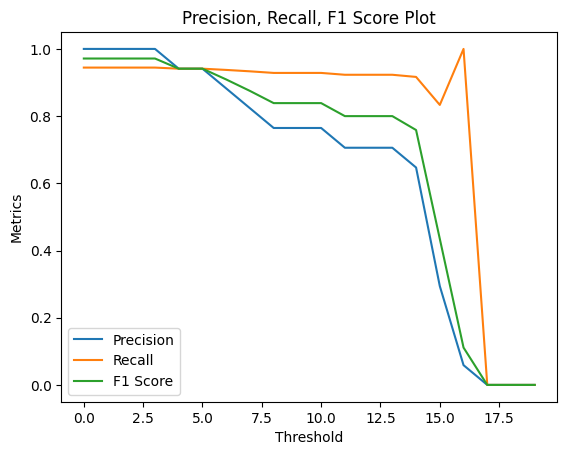

In [173]:
plt.plot(precs, label='Precision')
plt.plot(recalls, label='Recall')
plt.plot(f1s, label='F1 Score')

# Adding legend
plt.legend()

# Adding titles and labels
plt.title('Precision, Recall, F1 Score Plot')
plt.xlabel('Threshold')
plt.ylabel('Metrics')

In [175]:
pos = []
for i in range(round(max(ctrp))):
    tmp = (np.array(ctrp) < i).astype(int)
    pos.append(sum(tmp))

Text(0, 0.5, '# of positive')

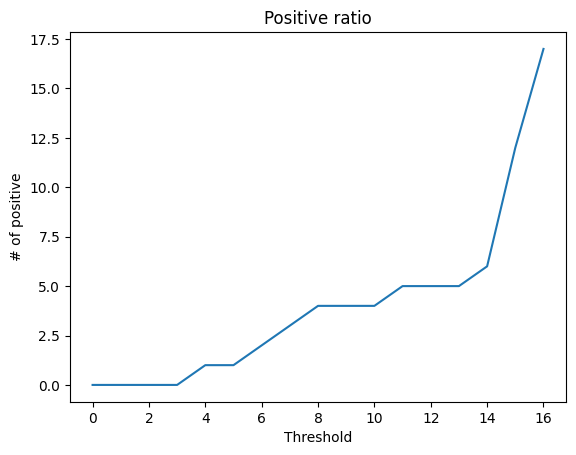

In [176]:
plt.plot(pos)

# Adding titles and labels
plt.title('Positive ratio')
plt.xlabel('Threshold')
plt.ylabel('# of positive')

In [188]:
res = (np.array(ctrp) > 16).astype(int)
res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

cosine similarity
Accuracy: 0.8888888888888888


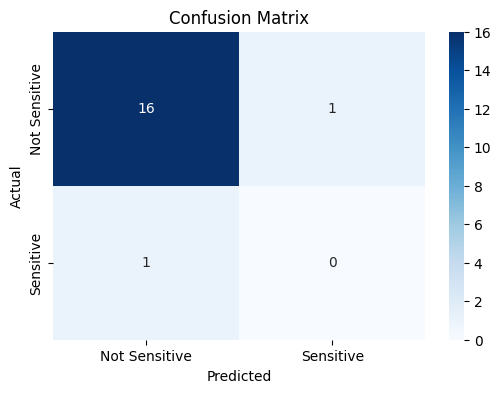

In [189]:
print('cosine similarity')
print("Accuracy:", accuracy_score(res, corr))
#     print("Precision:", precision_score(y_true, y_pred))
#     print("Recall:", recall_score(y_true, y_pred))
#     print("F1 Score:", f1_score(y_true, y_pred))

class_names = ["Not Sensitive", "Sensitive"]
cm = pd.DataFrame(confusion_matrix(res, corr), index=class_names, columns=class_names)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [355]:
tab['gdsc'] = np.array(sens).astype(int)
tab['attention'] = atten
tab['is_correct'] = tab['gdsc'] == tab['attention']

In [357]:
tab.to_csv('unknown_drug_response.csv')